<a href="https://colab.research.google.com/github/retanshichauhan/Prediction-Analysis-on-Titanic-Dataset/blob/main/Copy_of_DNA_SEQUENCING_ANALYSING_WITH_MACHINE_LEARNING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this project, I will apply a classification model that can predict a gene's function based on the DNA sequence of the coding sequence alone.

In [ ]:
import numpy as np
import pandas as pd

import pickle as pk
import seaborn as sys
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.multiclass import OneVsOneClassifier
from sklearn.metrics import classification_report, confusion_matrix
import random

%matplotlib inline


In [ ]:
human_data = pd.read_table('human_data.txt.zip')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


We have some data for human DNA sequence coding regions and a class label. We also have data for Chimpanzee and a more divergent species, the dog.


In [ ]:
chimp_data = pd.read_table('chimp_data.txt.zip')

chimp_data.head()



,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [ ]:
from google.colab import files
from IPython.display import Image



Here are the definations for each of the 7 classes and how many there are in the human training data. They are gene sequence function groups.

In [ ]:
uploaded=files.upload()

Saving dna_seq_image (1).webp to dna_seq_image (1).webp


Let's define a function to collect all possible overlapping k-mers of specified lenght from any sequence string. We will basically apply k-mers to complete sequence

In [ ]:
def getkmers(sequence, size=6):
  return[sequence[X:X+size].lower() for X in range(len(sequence)- size+1)]

now we can convert our training data sequence into short overlapping k mers of length 6. Lets do that for each species od data we have using getKmers function.

In [ ]:
human_data['words'] = human_data.apply(lambda X: getkmers(X['sequence']),axis=1)
human_data=human_data.drop('sequence', axis=1)

In [ ]:
chimp_data['words'] = chimp_data.apply(lambda X:getkmers(X['sequence']),axis=1)
chimp_data=chimp_data.drop('sequence', axis=1)

Now, our coding sequence data is changed to lowercase, split up into all possible k-mer words of length 6 and ready for the next step. Let's take a look.

In [ ]:
human_data.head()

,class,words
0,4,"[atgccc, tgcccc, gcccca, ccccaa, cccaac, ccaac..."
1,4,"[atgaac, tgaacg, gaacga, aacgaa, acgaaa, cgaaa..."
2,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
3,3,"[atgtgt, tgtgtg, gtgtgg, tgtggc, gtggca, tggca..."
4,3,"[atgcaa, tgcaac, gcaaca, caacag, aacagc, acagc..."


Since we are going to use scikit learn natural language processing tool to do the k-mer counting, we need to now convert the list of k-mers for each gene into string sentences of words that the count vectorize can use. We can also make a y variable to hold the class labels. Let's do that now

In [ ]:
human_texts = list(human_data['words'])
for item in range(len(human_texts)):
  human_texts[item] =' '.join(human_texts[item])
y_data = human_data.iloc[:,0].values

In [ ]:
print(human_texts[2])

atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggcatt gcattt catttg atttgg tttggg ttgggc tgggcg gggcgc ggcgct gcgctg cgctgt gctgtt ctgttt tgtttg gtttgg tttggc ttggca tggcag ggcagt gcagtg cagtga agtgat gtgatg tgatga gatgat atgatt tgattg gattgc attgcc ttgcct tgcctt gccttt cctttc ctttct tttctg ttctgt tctgtt ctgttc tgttca gttcag ttcagt tcagtg cagtgt agtgtc gtgtct tgtctg gtctga tctgag ctgagt tgagtg gagtgc agtgct gtgcta tgctat gctatg ctatga tatgaa atgaag tgaaga gaagat aagatt agattg gattgc attgca ttgcac tgcaca gcacac cacaca acacag cacaga acagag cagagg agaggt gaggtc aggtcc ggtcca gtccag tccaga ccagat cagatg agatgc gatgca atgcat tgcatt gcattc cattcc attccg ttccgt tccgtt ccgttt cgtttt gttttg ttttga tttgag ttgaga tgagaa gagaat agaatg gaatgt aatgtc atgtca tgtcaa gtcaat tcaatg caatgg aatgga atggat tggata ggatac gataca atacac tacacc acacca caccaa accaac ccaact caactg aactgc actgct ctgctg tgctgc gctgct ctgctt tgcttt gctttg ctttgg tttgga ttggat tggatt ggattt gatttc atttca tttcac ttcacc tcaccg caccgg accggt

In [ ]:
print(human_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatact atacta tactac actacc ctaccg taccgt accgta ccgtat cgtatg gtatgg tatggc atggcc tggccc ggccca gcccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctt tcctta ccttac cttaca ttacac tacact acacta cactat actatt ctattc tattcc attcct ttcctc tcctca cctcat ctcatc tcatca catcac atcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaac taaaca aaacac aacaca acacaa cacaaa acaaac caaact aaacta aactac actacc ctacca taccac accacc ccacct caccta acctac cctacc ctacct tacctc acctcc cctccc ctccct tccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaag caaagc aaagcc aagccc agccca gcccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaat aaaatt aaatta aattat attata ttataa tataac ataaca taacaa aacaaa acaaac

In [ ]:
print(human_texts[4])

atgcaa tgcaac gcaaca caacag aacagc acagca cagcat agcatt gcattt catttt attttg ttttga tttgaa ttgaat tgaatt gaattt aatttg atttga tttgaa ttgaat tgaata gaatac aatacc atacca taccag accaga ccagac cagacc agacca gaccaa accaaa ccaaag caaagt aaagtg aagtgg agtgga gtggat tggatg ggatgg gatggt atggtg tggtga ggtgag gtgaga tgagat gagata agataa gataat ataatc taatcc aatcct atcctt tccttc ccttca cttcat ttcatc tcatct catctt atcttt tcttta ctttat tttatg ttatga tatgac atgaca tgacaa gacaaa acaaag caaagg aaagga aaggag aggagg ggagga gaggaa aggaat ggaatt gaattg aattga attgag ttgagc tgagca gagcaa agcaaa gcaaac caaaca aaacaa aacaat acaatt caattt aatttg atttgt tttgta ttgtat tgtatg gtatgt tatgtt atgttg tgttgg gttgga ttggat tggatg ggatgg gatggt atggtg tggtgt ggtgtg gtgtgt tgtgtt gtgttt tgtttg gtttgc tttgca ttgcat tgcatt gcattt catttg atttgt tttgtt ttgttt tgtttt gtttta ttttac tttact ttactg tactgg actgga ctggat tggata ggatac gatact atactg tactgc actgcc ctgcca tgccaa gccaat ccaata caataa aataag ataaga taagaa aagaaa agaaag

In [ ]:
y_data

array([4, 4, 3, ..., 6, 6, 6])

We will perform the same steps for chimpanzee

In [ ]:
chimp_texts=list(chimp_data['words'])
for item in range(len(chimp_texts)):
  chimp_texts[item] =' '.join(chimp_texts[item])
y_data = chimp_data.iloc[:,0].values

In [ ]:
print(chimp_texts[0])

atgccc tgcccc gcccca ccccaa cccaac ccaact caacta aactaa actaaa ctaaat taaata aaatac aatacc ataccg taccgc accgcc ccgccg cgccgt gccgta ccgtat cgtatg gtatga tatgac atgacc tgaccc gaccca acccac cccacc ccacca caccat accata ccataa cataat ataatt taatta aattac attacc ttaccc tacccc accccc ccccca ccccat cccata ccatac catact atactc tactcc actcct ctcctg tcctga cctgac ctgaca tgacac gacact acacta cactat actatt ctattt tatttc atttct tttctc ttctcg tctcgt ctcgtc tcgtca cgtcac gtcacc tcaccc caccca acccaa cccaac ccaact caacta aactaa actaaa ctaaaa taaaaa aaaaat aaaata aaatat aatatt atatta tattaa attaaa ttaaat taaatt aaattc aattca attcaa ttcaaa tcaaat caaatt aaatta aattac attacc ttacca taccat accatc ccatct catcta atctac tctacc ctaccc tacccc accccc cccccc ccccct cccctc ccctca cctcac ctcacc tcacca caccaa accaaa ccaaaa caaaac aaaacc aaaccc aaccca acccat cccata ccataa cataaa ataaaa taaaaa aaaaat aaaata aaataa aataaa ataaaa taaaaa aaaaaa aaaaac aaaact aaacta aactac actaca ctacaa tacaat acaata caataa aataaa ataaac

Now we will apply the Bag of words using CountVectorizer using NLP

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(ngram_range=(4,4))
X = cv.fit_transform(human_texts)
X_chimp = cv.transform(chimp_texts)



In [ ]:
print(X.shape)
print(X_chimp.shape)


(4380, 232414)
(1682, 232414)


If we have a look at class balance we can see we have relatively balanced dataset

<Axes: xlabel='class'>

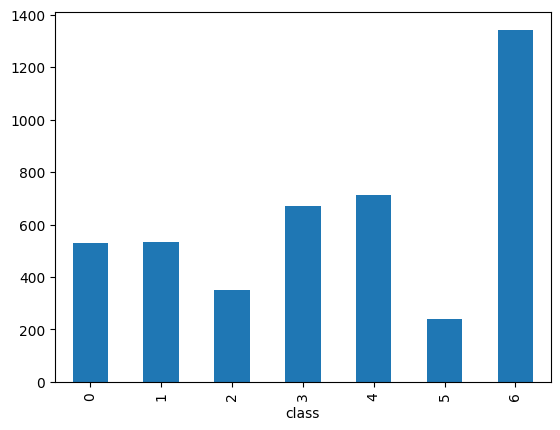

In [ ]:
human_data['class'].value_counts().sort_index().plot.bar()

<Axes: xlabel='class'>

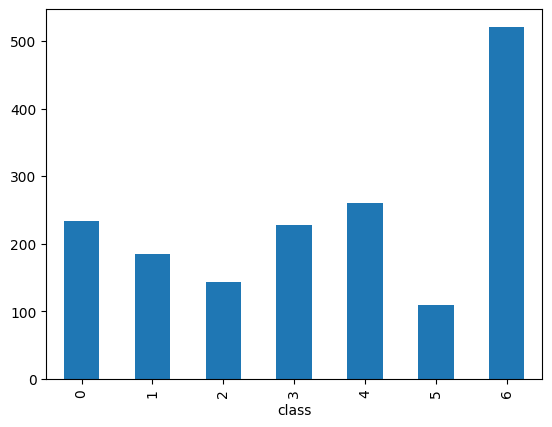

In [ ]:
chimp_data['class'].value_counts().sort_index().plot.bar()

In [ ]:
plt.figure(figsize=(12,4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

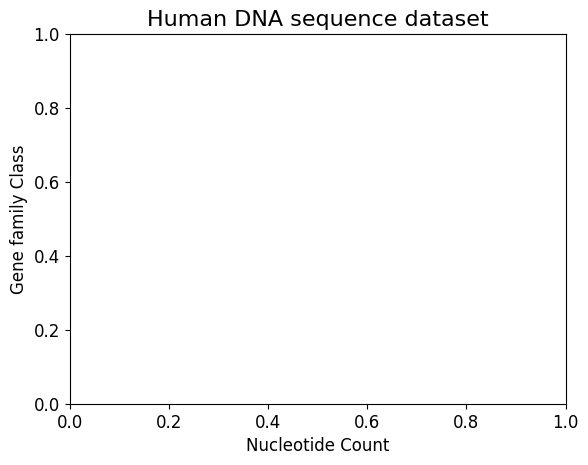

In [ ]:
plt.title('Human DNA sequence dataset', fontsize=16)
plt.xlabel('Nucleotide Count', fontsize=12)
plt.ylabel('Gene family Class', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12);

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0, 0.0, '0.0'),
  Text(0, 0.2, '0.2'),
  Text(0, 0.4, '0.4'),
  Text(0, 0.6000000000000001, '0.6'),
  Text(0, 0.8, '0.8'),
  Text(0, 1.0, '1.0')])

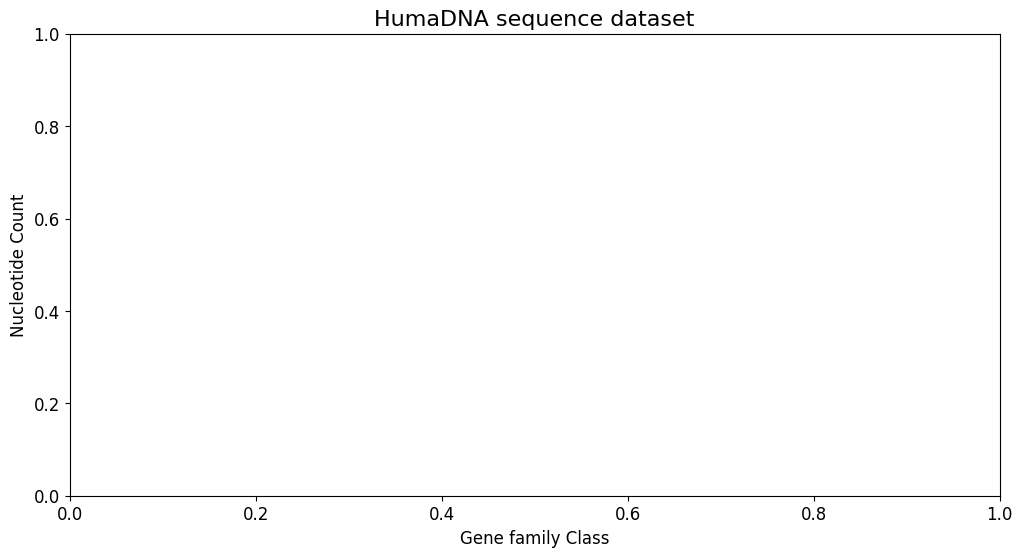

In [ ]:
fig, ax=plt.subplots(figsize=(12,6))
plt.title('HumaDNA sequence dataset', fontsize=16)

plt.ylabel('Nucleotide Count', fontsize=12)
plt.xlabel('Gene family Class', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


In [ ]:
def CreatKmers(sequence, kmer_length):
  return[sequence[x:x+kmer_lenght].lower() for x in range(len(sequence) - kmer_length+1)]

In [ ]:
human_data.drop(columns=['class','words'], inplace=True)

In [ ]:
human_data.columns

Index(['class', 'words'], dtype='object')

In [ ]:
human_data.dtypes

,0


In [ ]:
human_data.isnull().sum()

,0


In [ ]:
human_data.shape

(4380, 0)

In [ ]:
human_data.dtypes

,0


In [ ]:
training_set=pd.read_table('human_data.txt.zip')

In [ ]:
test_set=pd.read_table('human_data.txt.zip')

In [ ]:
print(training_set.shape)
print(test_set.shape)

(4380, 2)
(4380, 2)


In [ ]:
training_set=pd.read_table('chimp_data.txt.zip')
test_set=pd.read_table('chimp_data.txt.zip')

In [ ]:
print(training_set.shape)
print(test_set.shape)

(1682, 2)
(1682, 2)
